In [4]:
from nltools.data import Design_Matrix
import numpy as np
import pandas as pd

TR = .001

#create a sample matrix of 8 minutes 20 seconds video on, 20 seconds video off


In [22]:
raw_dm = np.zeros((8*60*1000,3))
onset_times = pd.DataFrame(data={
    'condition_1':[0,60,120,180,240,300,360,420],
    'condition_2':[20,80,140,200,260,320,380,440],
    'condition_3':[40,100,160,220,280,340,400,460]
})

for index, row in onset_times.iterrows():
    raw_dm[row.condition_1*1000:(row.condition_1+10)*1000,0]=1
    raw_dm[row.condition_2*1000:(row.condition_2+10)*1000,1]=1
    raw_dm[row.condition_3*1000:(row.condition_3+10)*1000,2]=1

In [23]:
dm = Design_Matrix(raw_dm, sampling_freq=1./TR, columns=['vids1','vids2','vids3'])

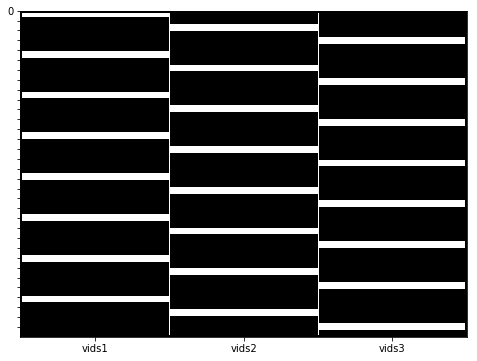

In [24]:
dm.heatmap()

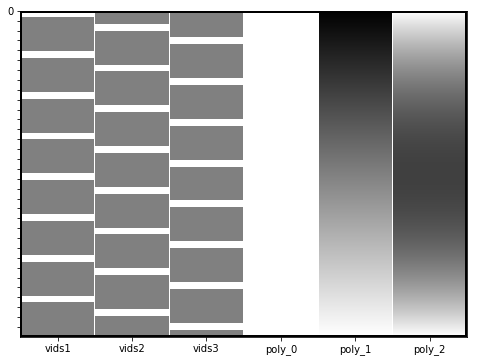

In [26]:
dm_with_nuissance = dm.add_poly(2,include_lower=True)
dm_with_nuissance.heatmap()

In [33]:
dm_convolved = dm_with_nuissance.convolve()

In [35]:
dm_convolved.mean()

vids1_c0    1.666667e-01
vids2_c0    1.666668e-01
vids3_c0    1.699968e-01
poly_0      1.000000e+00
poly_1     -5.774501e-17
poly_2      2.083338e-06
dtype: float64

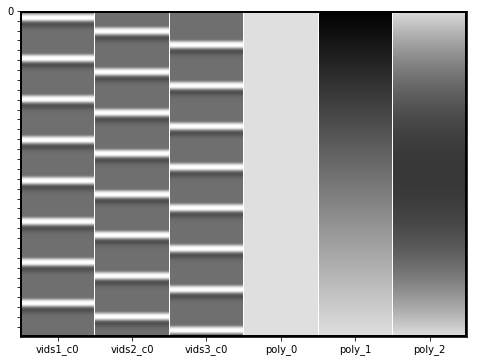

In [37]:
dm_convolved.heatmap()

In [39]:
dm_tr_space = dm_convolved.iloc[::2340,:]

In [48]:
dm_tr_space.mean()

vids1_c0    0.165962
vids2_c0    0.165961
vids3_c0    0.168798
poly_0      1.000000
poly_1     -0.000623
poly_2      0.004250
dtype: float64

/Users/phoenix/anaconda3/lib/python3.6/site-packages/nltools/file_reader.py:60: UserWarning: Only 2 columns in file, assuming all stimuli are the same duration
  warnings.warn("Only 2 columns in file, assuming all stimuli are the same duration")


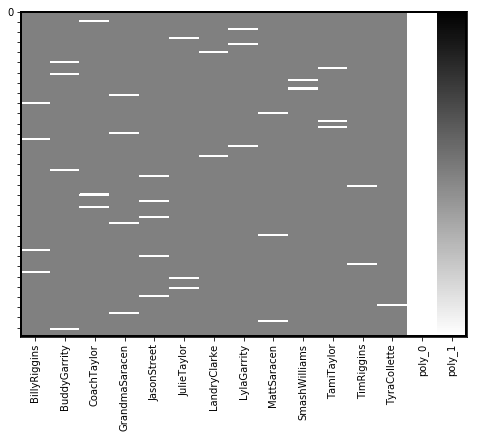

In [44]:
from nltools.utils import get_resource_path
from nltools.file_reader import onsets_to_dm
from nltools.data import Design_Matrix
import os

TR = 2.0
sampling_freq = 1./TR
onsetsFile = os.path.join(get_resource_path(),'onsets_example.txt')
dm = onsets_to_dm(onsetsFile, sampling_freq=sampling_freq, run_length=160, sort=True,add_poly=1)
dm.heatmap()

In [47]:
dm.mean()

BillyRiggins      2.500000e-02
BuddyGarrity      2.500000e-02
CoachTaylor       1.875000e-02
GrandmaSaracen    2.500000e-02
JasonStreet       3.125000e-02
JulieTaylor       1.875000e-02
LandryClarke      1.250000e-02
LylaGarrity       1.875000e-02
MattSaracen       1.875000e-02
SmashWilliams     1.250000e-02
TamiTaylor        1.875000e-02
TimRiggins        1.250000e-02
TyraCollette      6.250000e-03
poly_0            1.000000e+00
poly_1            5.551115e-18
dtype: float64